In [1]:
import sys
sys.path.append('/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot')
import chivo_grid_utl as utl
import numpy as np
import pyart
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from netCDF4 import Dataset
import netCDF4
import scipy.ndimage as spyi
import cmocean
from mpl_toolkits.basemap import Basemap


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Create grid
'/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/level_1b.2/2018/12/14/chivo.1b.2.20181214_013054.REL_PFAR360.nc'
file = '/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/level_1b.2/2018/12/14/chivo.1b.2.20181214_020047.REL_PFAR360.nc'
'/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/level_1b.2/2018/12/14/chivo.1b.2.20181214_023049.REL_PNL360A.nc'
'/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/level_1b.2/2018/12/14/chivo.1b.2.20181214_024046.REL_PNL360A.nc'
radar = pyart.io.read(file)
grid = utl.grid_radar(radar)

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


In [14]:
# Compute echotops, max. reflectivity and RainRate from the grid
y, z, x = np.meshgrid(0.001*grid.y['data'],  0.001*grid.z['data'],  0.001*grid.x['data'])
reflectivity = grid.fields['corrected_reflectivity']['data']
RainRate = grid.fields['RainRate']['data']
HydroClass = grid.fields['HydroClass']['data'][1]
reflectivity = spyi.gaussian_filter(reflectivity, sigma = 4)

z = np.ma.masked_where( reflectivity < 18, z)
echo_top = np.amax(z, axis=0)
echo_top = np.ma.masked_where( echo_top < 4, echo_top)

max_ref = np.amax(reflectivity, axis=0)
RainRate = np.amax(RainRate, axis=0)

In [3]:
# Read topography

topo_filename = '/net/k2/storage/people/idariash/home/CSU/RELAMPAGO/analysis/Mountain/terr.nc'
topography = Dataset(topo_filename)

lons = topography.variables['X'][:]
lats = topography.variables['Y'][:]
terr = 0.001*topography.variables['topo'][:]


height_toCut = 2
reflectivity_toCut = 5
range_toCut = 200
 

lon_0 = grid.origin_longitude['data']
lat_0 = grid.origin_latitude['data']

delta = 6#deg
lats_mask = np.absolute(lats - lat_0) < delta

lons_mask = np.absolute(lons - lon_0) < delta

Sierras_terr = terr[lats_mask, :]
Sierras_terr = Sierras_terr[:, lons_mask]
Sierras_terr = np.ma.masked_where( Sierras_terr < 0.5, Sierras_terr)

Sierras_lons = lons[lons_mask]
Sierras_lats = lats[lats_mask]

Sierras_lons_grid, Sierras_lats_grid = np.meshgrid(Sierras_lons, Sierras_lats)

Sierras_terr = spyi.gaussian_filter(Sierras_terr, sigma = 2)

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: The following kwargs were not used by contour: 'animated'


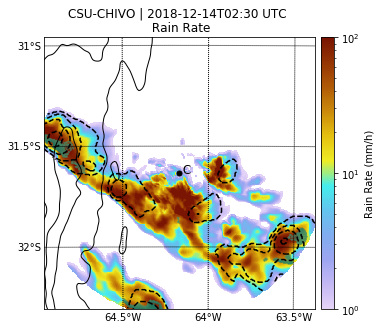

In [9]:
file = '/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Climatology/Dec_14_ppi/Link to chivo.1b.2.20181214_023049.REL_PNL360A.nc'
radar = pyart.io.read(file)
grid = utl.grid_radar(radar)
y, z, x = np.meshgrid(0.001*grid.y['data'],  0.001*grid.z['data'],  0.001*grid.x['data'])
reflectivity = grid.fields['corrected_reflectivity']['data']
RainRate = grid.fields['RainRate']['data']
HydroClass = grid.fields['HydroClass']['data'][1]
reflectivity = spyi.gaussian_filter(reflectivity, sigma = 4)

z = np.ma.masked_where( reflectivity < 18, z)
echo_top = np.amax(z, axis=0)
echo_top = np.ma.masked_where( echo_top < 4, echo_top)

max_ref = np.amax(reflectivity, axis=0)
RainRate = np.amax(RainRate, axis=0)
fig = plt.figure(figsize=(6, 5))



m = Basemap(projection='lcc', resolution=None,
            width=150E3, height=150E3, 
            lat_0=lat_0, lon_0=lon_0)

#m.etopo(scale=2, alpha=0.5)

parallels = np.arange(-40,-20,0.5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,False, False])

meridians = np.arange(-70,-60.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])

x_Cordoba, y_Cordoba = m(-64.19, -31.42)
x_CHIVO, y_CHIVO = m(-64.1686, -31.6342)
x_ARM, y_ARM = m(-64.7284, -32.1264)
x_Rio4to, y_Rio4to = m(-64.3493, -33.1232)

plt.plot(x_CHIVO, y_CHIVO, 'ok', markersize=5)
plt.text(x_CHIVO, y_CHIVO, ' C', fontsize=12);

# plt.plot(x_ARM, y_ARM, 'ok', markersize=5)
# plt.text(x_ARM, y_ARM, ' Y', fontsize=12);

levels_terr = [1, 2]

m.contour(Sierras_lons_grid, Sierras_lats_grid, Sierras_terr, levels_terr, 
               latlon = True, linewidths = 1, colors = 'k',
                      linestyles='solid', antialiased=True, animated=True)



lon_0 = grid.origin_longitude['data']
lat_0 = grid.origin_latitude['data']
chivo_lons, chivo_lats = grid.get_point_longitude_latitude()

x, y = np.meshgrid(0.001*grid.x['data'],  0.001*grid.y['data'])
R = np.sqrt(x ** 2 + y ** 2)
echo_top = np.ma.masked_where( R > 80, echo_top)
echo_top_smooth = echo_top#spyi.gaussian_filter(echo_top, sigma = 0.1)
echo_top_smooth = np.ma.masked_where( echo_top_smooth < 11, echo_top_smooth)

RainRate = np.ma.masked_where( R > 80, RainRate)
RainRate = np.ma.masked_where( RainRate < 1, RainRate)
HydroClass = np.ma.masked_where(HydroClass < 10, HydroClass)
HydroClass = np.ma.masked_where(HydroClass > 11, HydroClass)
HydroClass = np.ma.masked_where(R > 80, HydroClass)
HydroClass = np.ma.masked_where(max_ref <  40, HydroClass)


cs = m.pcolormesh(chivo_lons, chivo_lats, RainRate, vmin=1, vmax=100, latlon=True,
        cmap=pyart.graph.cm.LangRainbow12, norm=colors.LogNorm())

m.scatter(chivo_lons, chivo_lats, s = 0.5,c = HydroClass, marker = 'x',
          vmin=5, vmax=15, latlon=True, cmap=cmocean.cm.rain, alpha = 0.5)

m.contour(chivo_lons, chivo_lats, echo_top, [12, 14, 16, 18], 
               latlon = True, linewidths = 1.5, colors = 'k',
                      linestyles='dashed',antialiased=True,  animated=True)

#cmap = pyart.graph.cm.NWSRef)#cmap = pyart.graph.cm.LangRainbow12)#cmap=cmocean.cm.rain)#, norm=norm_precip)

m.colorbar(cs, label='Rain Rate (mm/h)')

time_start = netCDF4.num2date(grid.time['data'][0], grid.time['units'])
time_text = time_start.strftime('%Y-%m-%dT%H:%M')


plt.title('CSU-CHIVO | '+ time_text+ ' UTC'+ ' \n Rain Rate')
fig_name = './fig/radar_retrieval/radar_retrieval_' + time_text + 'png'


/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: No contour levels were found within the data range.
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: The following kwargs were not used by contour: 'animated'


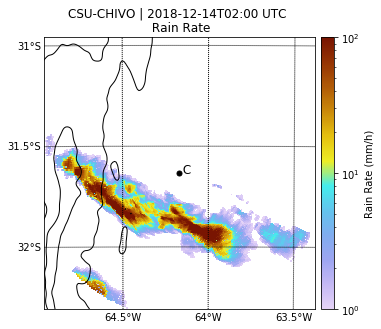

In [15]:
fig = plt.figure(figsize=(6, 5))



m = Basemap(projection='lcc', resolution=None,
            width=150E3, height=150E3, 
            lat_0=lat_0, lon_0=lon_0)

#m.etopo(scale=2, alpha=0.5)

parallels = np.arange(-40,-20,0.5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,False, False])

meridians = np.arange(-70,-60.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])

x_Cordoba, y_Cordoba = m(-64.19, -31.42)
x_CHIVO, y_CHIVO = m(-64.1686, -31.6342)
x_ARM, y_ARM = m(-64.7284, -32.1264)
x_Rio4to, y_Rio4to = m(-64.3493, -33.1232)

plt.plot(x_CHIVO, y_CHIVO, 'ok', markersize=5)
plt.text(x_CHIVO, y_CHIVO, ' C', fontsize=12);

# plt.plot(x_ARM, y_ARM, 'ok', markersize=5)
# plt.text(x_ARM, y_ARM, ' Y', fontsize=12);

levels_terr = [1, 2]

m.contour(Sierras_lons_grid, Sierras_lats_grid, Sierras_terr, levels_terr, 
               latlon = True, linewidths = 1, colors = 'k',
                      linestyles='solid', antialiased=True, animated=True)



lon_0 = grid.origin_longitude['data']
lat_0 = grid.origin_latitude['data']
chivo_lons, chivo_lats = grid.get_point_longitude_latitude()

x, y = np.meshgrid(0.001*grid.x['data'],  0.001*grid.y['data'])
R = np.sqrt(x ** 2 + y ** 2)
echo_top = np.ma.masked_where( R > 80, echo_top)
echo_top_smooth = echo_top#spyi.gaussian_filter(echo_top, sigma = 0.1)
echo_top_smooth = np.ma.masked_where( echo_top_smooth < 11, echo_top_smooth)

RainRate = np.ma.masked_where( R > 80, RainRate)
RainRate = np.ma.masked_where( RainRate < 1, RainRate)
HydroClass = np.ma.masked_where(HydroClass < 10, HydroClass)
HydroClass = np.ma.masked_where(HydroClass > 11, HydroClass)
HydroClass = np.ma.masked_where(R > 80, HydroClass)
HydroClass = np.ma.masked_where(max_ref <  40, HydroClass)


cs = m.pcolormesh(chivo_lons, chivo_lats, RainRate, vmin=1, vmax=100, latlon=True,
        cmap=pyart.graph.cm.LangRainbow12, norm=colors.LogNorm())

m.pcolormesh(chivo_lons, chivo_lats, HydroClass, vmin=5, vmax=15, latlon=True,
            cmap=cmocean.cm.rain, alpha = 0.5)

m.contour(chivo_lons, chivo_lats, echo_top, [12, 14, 16, 18], 
               latlon = True, linewidths = 1.5, colors = 'k',
                      linestyles='dashed',antialiased=True,  animated=True)

#cmap = pyart.graph.cm.NWSRef)#cmap = pyart.graph.cm.LangRainbow12)#cmap=cmocean.cm.rain)#, norm=norm_precip)

m.colorbar(cs, label='Rain Rate (mm/h)')

time_start = netCDF4.num2date(grid.time['data'][0], grid.time['units'])
time_text = time_start.strftime('%Y-%m-%dT%H:%M')


plt.title('CSU-CHIVO | '+ time_text+ ' UTC'+ ' \n Rain Rate')
fig_name = './fig/radar_retrieval/radar_retrieval_' + time_text + 'png'

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: No contour levels were found within the data range.
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'animated'


Text(0.5, 1.0, 'CSU-CHIVO | 2018-12-14T02:00 UTC \n Rain Rate')

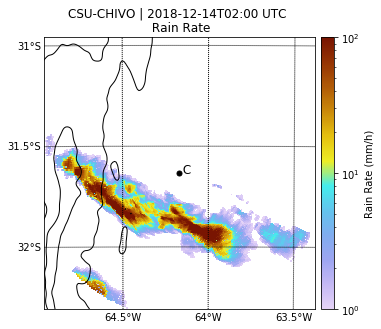

In [10]:
# Echo top figure

fig = plt.figure(figsize=(6, 5))



m = Basemap(projection='lcc', resolution=None,
            width=150E3, height=150E3, 
            lat_0=lat_0, lon_0=lon_0)

#m.etopo(scale=2, alpha=0.5)

parallels = np.arange(-40,-20,0.5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,False, False])

meridians = np.arange(-70,-60.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])

x_Cordoba, y_Cordoba = m(-64.19, -31.42)
x_CHIVO, y_CHIVO = m(-64.1686, -31.6342)
x_ARM, y_ARM = m(-64.7284, -32.1264)
x_Rio4to, y_Rio4to = m(-64.3493, -33.1232)

plt.plot(x_CHIVO, y_CHIVO, 'ok', markersize=5)
plt.text(x_CHIVO, y_CHIVO, ' C', fontsize=12);
                                       
# plt.plot(x_ARM, y_ARM, 'ok', markersize=5)
# plt.text(x_ARM, y_ARM, ' Y', fontsize=12);
                                       
levels_terr = [1, 2]

m.contour(Sierras_lons_grid, Sierras_lats_grid, Sierras_terr, levels_terr, 
               latlon = True, linewidths = 1, colors = 'k',
                      linestyles='solid', antialiased=True, animated=True)



lon_0 = grid.origin_longitude['data']
lat_0 = grid.origin_latitude['data']
chivo_lons, chivo_lats = grid.get_point_longitude_latitude()

x, y = np.meshgrid(0.001*grid.x['data'],  0.001*grid.y['data'])
R = np.sqrt(x ** 2 + y ** 2)
echo_top = np.ma.masked_where( R > 80, echo_top)
echo_top_smooth = echo_top#spyi.gaussian_filter(echo_top, sigma = 0.1)
echo_top_smooth = np.ma.masked_where( echo_top_smooth < 11, echo_top_smooth)

RainRate = np.ma.masked_where( R > 80, RainRate)
RainRate = np.ma.masked_where( RainRate < 1, RainRate)
HydroClass = np.ma.masked_where(HydroClass < 10, HydroClass)
HydroClass = np.ma.masked_where(HydroClass > 11, HydroClass)
HydroClass = np.ma.masked_where(R > 80, HydroClass)
HydroClass = np.ma.masked_where(max_ref <  40, HydroClass)

  
cs = m.pcolormesh(chivo_lons, chivo_lats, RainRate, vmin=1, vmax=100, latlon=True,
            cmap=pyart.graph.cm.LangRainbow12, norm=colors.LogNorm())

m.pcolormesh(chivo_lons, chivo_lats, HydroClass, vmin=5, vmax=15, latlon=True,
            cmap=cmocean.cm.rain, alpha = 0.5)

m.contour(chivo_lons, chivo_lats, echo_top, [12, 14, 16, 18], 
               latlon = True, linewidths = 1.5, colors = 'k',
                      linestyles='dashed',antialiased=True,  animated=True)

#cmap = pyart.graph.cm.NWSRef)#cmap = pyart.graph.cm.LangRainbow12)#cmap=cmocean.cm.rain)#, norm=norm_precip)

m.colorbar(cs, label='Rain Rate (mm/h)')

time_start = netCDF4.num2date(grid.time['data'][0], grid.time['units'])
time_text = time_start.strftime('%Y-%m-%dT%H:%M')


plt.title('CSU-CHIVO | '+ time_text+ ' UTC'+ ' \n Rain Rate')

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'animated'


Text(0.5, 1.0, 'CSU-CHIVO | 2018-12-14T02:00 UTC \n Echo top height')

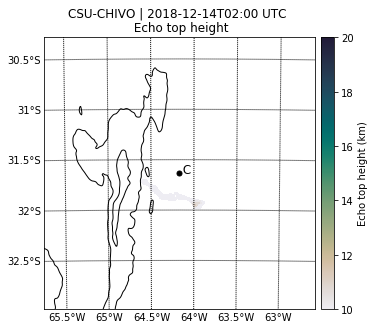

In [6]:
# Echo top figure

fig = plt.figure(figsize=(6, 5))



m = Basemap(projection='lcc', resolution=None,
            width=300E3, height=300E3, 
            lat_0=lat_0, lon_0=lon_0)

#m.etopo(scale=2, alpha=0.5)

parallels = np.arange(-40,-20,0.5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,False, False])

meridians = np.arange(-70,-60.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])

x_Cordoba, y_Cordoba = m(-64.19, -31.42)
x_CHIVO, y_CHIVO = m(-64.1686, -31.6342)
x_ARM, y_ARM = m(-64.7284, -32.1264)
x_Rio4to, y_Rio4to = m(-64.3493, -33.1232)

plt.plot(x_CHIVO, y_CHIVO, 'ok', markersize=5)
plt.text(x_CHIVO, y_CHIVO, ' C', fontsize=12);
                                       
# plt.plot(x_ARM, y_ARM, 'ok', markersize=5)
# plt.text(x_ARM, y_ARM, ' Y', fontsize=12);
                                       
levels_terr = [1, 2]

m.contour(Sierras_lons_grid, Sierras_lats_grid, Sierras_terr, levels_terr, 
               latlon = True, linewidths = 1, colors = 'k',
                      linestyles='solid', antialiased=True, animated=True)



lon_0 = grid.origin_longitude['data']
lat_0 = grid.origin_latitude['data']
chivo_lons, chivo_lats = grid.get_point_longitude_latitude()

x, y = np.meshgrid(0.001*grid.x['data'],  0.001*grid.y['data'])
R = np.sqrt(x ** 2 + y ** 2)
echo_top = np.ma.masked_where( R > 80, echo_top)
RainRate = np.ma.masked_where( R > 80, RainRate)
RainRate = np.ma.masked_where( RainRate < 1, RainRate)
HydroClass = np.ma.masked_where(HydroClass < 10, HydroClass)
HydroClass = np.ma.masked_where(HydroClass > 11, HydroClass)
HydroClass = np.ma.masked_where(R > 80, HydroClass)
HydroClass = np.ma.masked_where(max_ref <  40, HydroClass)
  
cs = m.pcolormesh(chivo_lons, chivo_lats, echo_top, vmin=10, vmax=20, latlon=True,
        cmap=cmocean.cm.rain)#cmap = pyart.graph.cm.NWSRef)#cmap = pyart.graph.cm.LangRainbow12)#cmap=cmocean.cm.rain)#, norm=norm_precip)
   
m.colorbar(cs, label='Echo top height (km)')

time_start = netCDF4.num2date(grid.time['data'][0], grid.time['units'])
time_text = time_start.strftime('%Y-%m-%dT%H:%M UTC')


plt.title('CSU-CHIVO | '+ time_text+ ' \n Echo top height')

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/top/stud

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: No contour levels were found within the data range.
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: No contour levels were found within the data range.
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: The following kwargs were not used by 

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: No contour levels were found within the data range.
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: The following kwargs were not used by contour: 'animated'
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: The fo

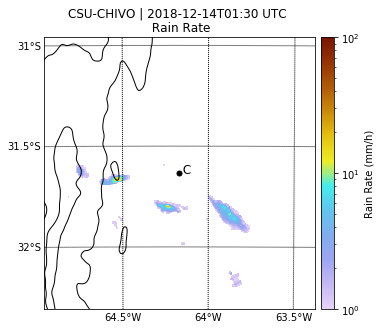

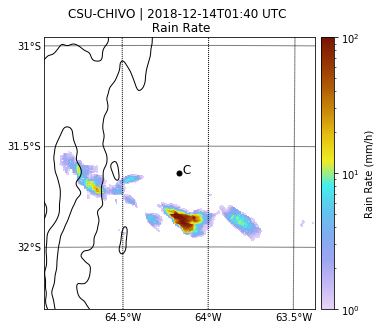

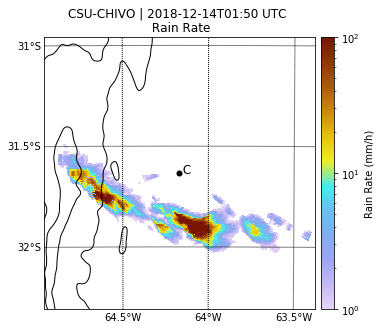

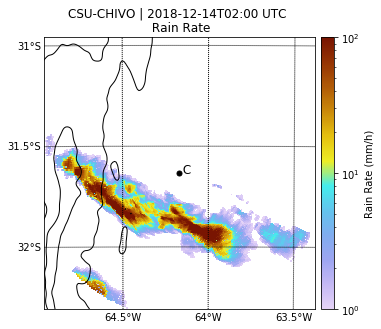

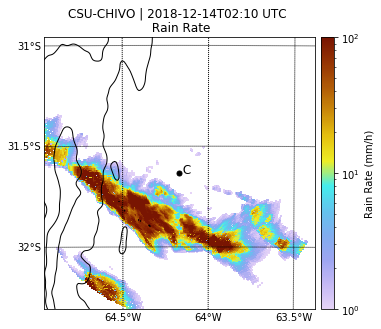

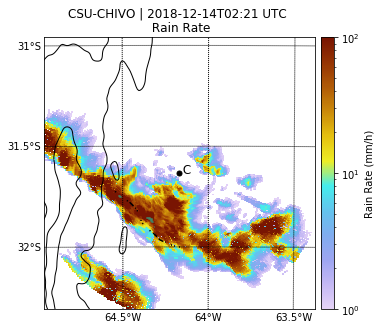

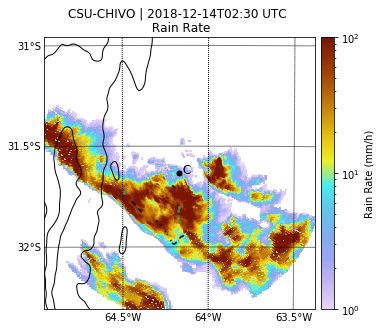

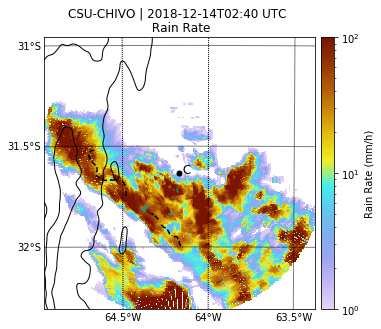

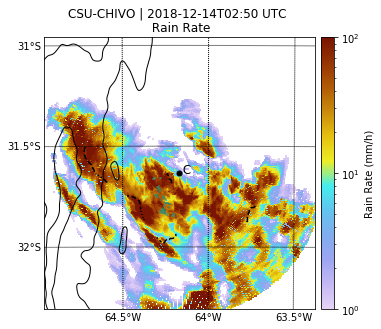

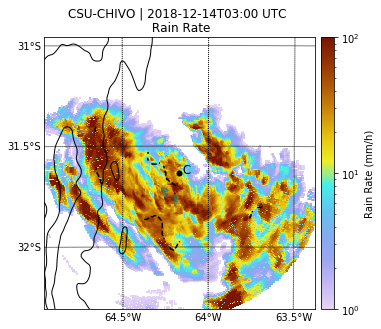

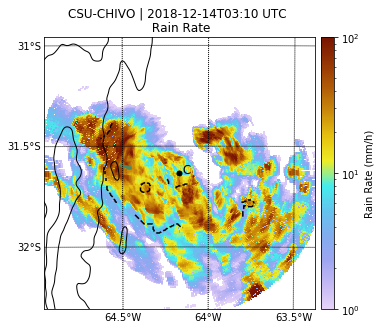

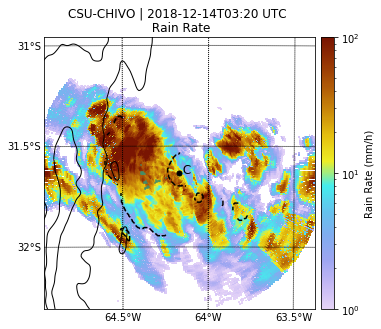

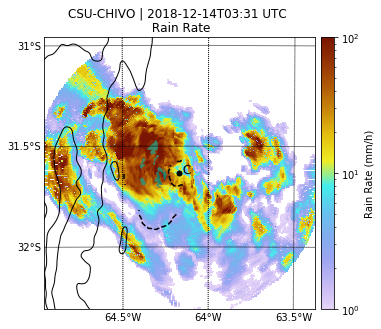

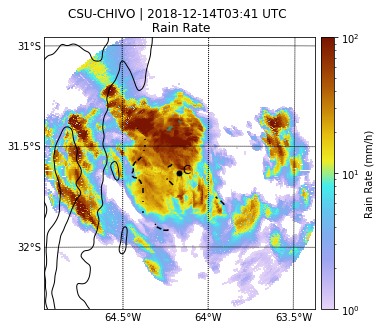

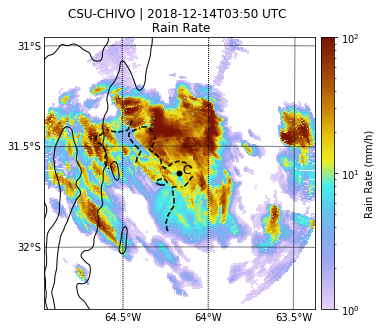

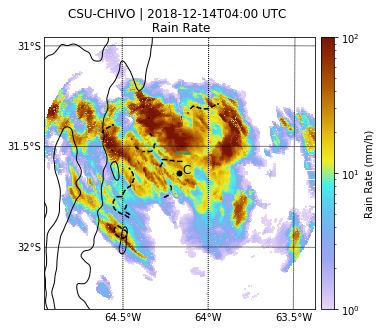

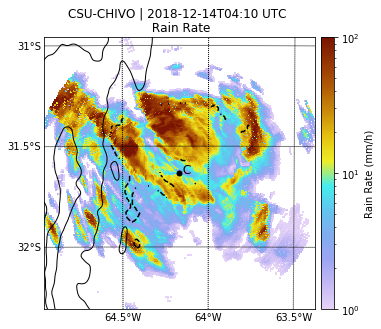

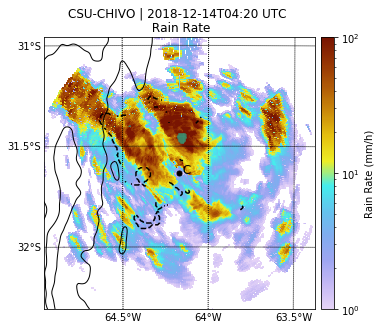

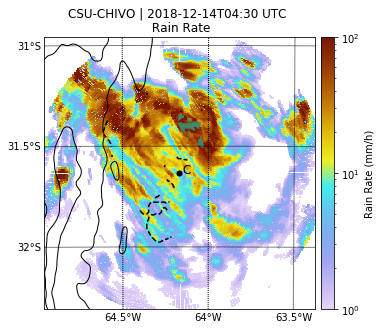

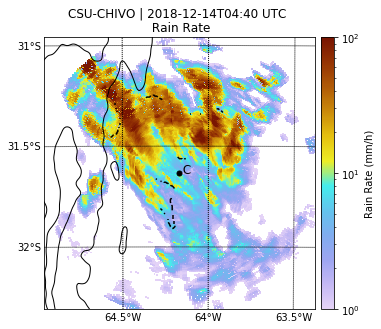

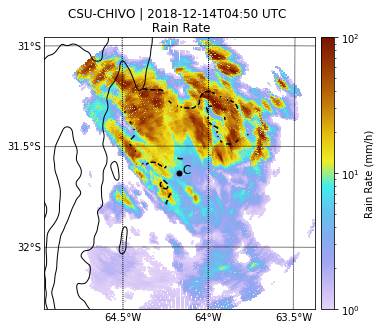

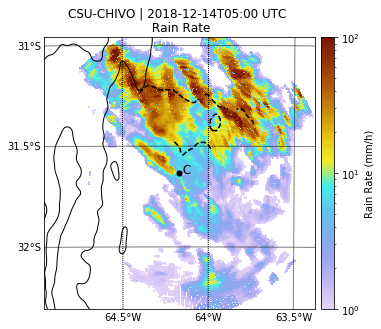

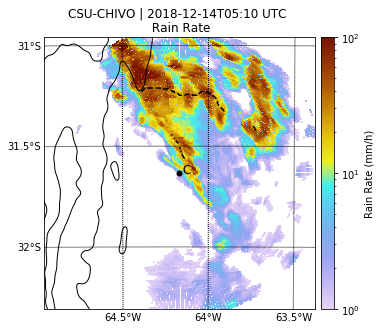

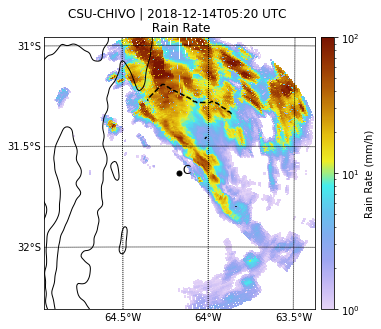

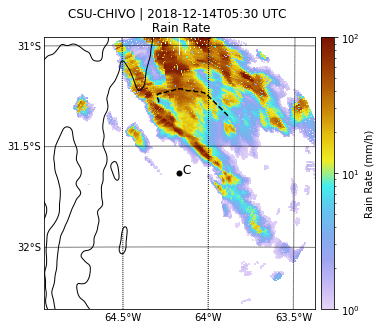

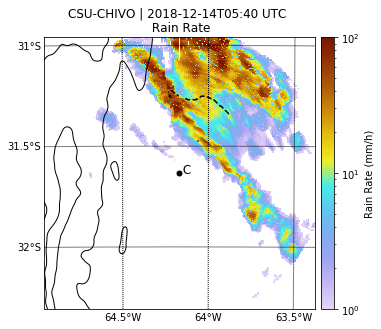

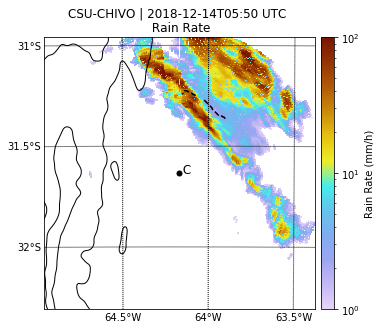

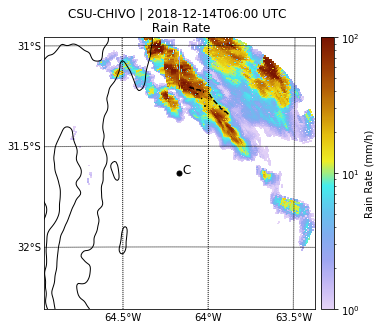

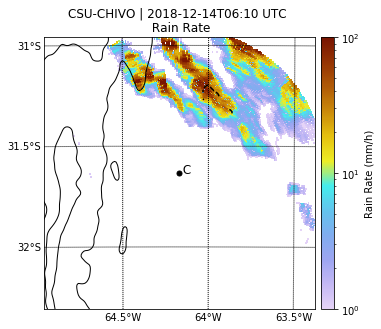

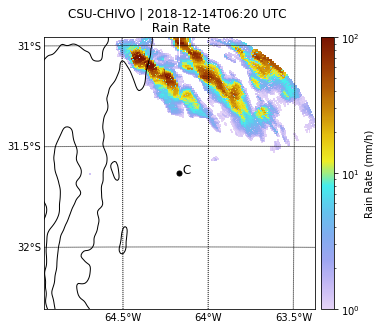

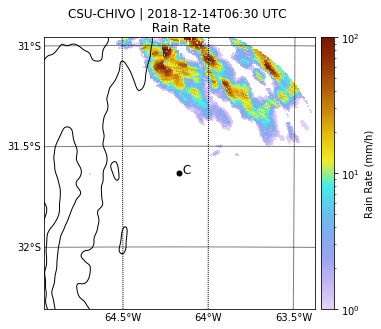

In [8]:
import glob

input_path = '/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Climatology/Dec_14_ppi'

files = [f for f in glob.glob(input_path +"/**/*.nc", recursive=True)]
files.sort()

for file in files:
    radar = pyart.io.read(file)
    grid = utl.grid_radar(radar)
    y, z, x = np.meshgrid(0.001*grid.y['data'],  0.001*grid.z['data'],  0.001*grid.x['data'])
    reflectivity = grid.fields['corrected_reflectivity']['data']
    RainRate = grid.fields['RainRate']['data']
    HydroClass = grid.fields['HydroClass']['data'][1]
    reflectivity = spyi.gaussian_filter(reflectivity, sigma = 4)

    z = np.ma.masked_where( reflectivity < 18, z)
    echo_top = np.amax(z, axis=0)
    echo_top = np.ma.masked_where( echo_top < 4, echo_top)

    max_ref = np.amax(reflectivity, axis=0)
    RainRate = np.amax(RainRate, axis=0)
    fig = plt.figure(figsize=(6, 5))



    m = Basemap(projection='lcc', resolution=None,
                width=150E3, height=150E3, 
                lat_0=lat_0, lon_0=lon_0)

    #m.etopo(scale=2, alpha=0.5)

    parallels = np.arange(-40,-20,0.5)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[True,False,False, False])

    meridians = np.arange(-70,-60.,0.5)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    x_Cordoba, y_Cordoba = m(-64.19, -31.42)
    x_CHIVO, y_CHIVO = m(-64.1686, -31.6342)
    x_ARM, y_ARM = m(-64.7284, -32.1264)
    x_Rio4to, y_Rio4to = m(-64.3493, -33.1232)

    plt.plot(x_CHIVO, y_CHIVO, 'ok', markersize=5)
    plt.text(x_CHIVO, y_CHIVO, ' C', fontsize=12);

    # plt.plot(x_ARM, y_ARM, 'ok', markersize=5)
    # plt.text(x_ARM, y_ARM, ' Y', fontsize=12);

    levels_terr = [1, 2]

    m.contour(Sierras_lons_grid, Sierras_lats_grid, Sierras_terr, levels_terr, 
                   latlon = True, linewidths = 1, colors = 'k',
                          linestyles='solid', antialiased=True, animated=True)



    lon_0 = grid.origin_longitude['data']
    lat_0 = grid.origin_latitude['data']
    chivo_lons, chivo_lats = grid.get_point_longitude_latitude()

    x, y = np.meshgrid(0.001*grid.x['data'],  0.001*grid.y['data'])
    R = np.sqrt(x ** 2 + y ** 2)
    echo_top = np.ma.masked_where( R > 80, echo_top)
    echo_top_smooth = echo_top#spyi.gaussian_filter(echo_top, sigma = 0.1)
    echo_top_smooth = np.ma.masked_where( echo_top_smooth < 11, echo_top_smooth)

    RainRate = np.ma.masked_where( R > 80, RainRate)
    RainRate = np.ma.masked_where( RainRate < 1, RainRate)
    HydroClass = np.ma.masked_where(HydroClass < 10, HydroClass)
    HydroClass = np.ma.masked_where(HydroClass > 11, HydroClass)
    HydroClass = np.ma.masked_where(R > 80, HydroClass)
    HydroClass = np.ma.masked_where(max_ref <  40, HydroClass)


    cs = m.pcolormesh(chivo_lons, chivo_lats, RainRate, vmin=1, vmax=100, latlon=True,
            cmap=pyart.graph.cm.LangRainbow12, norm=colors.LogNorm())

    m.pcolormesh(chivo_lons, chivo_lats, HydroClass, vmin=5, vmax=15, latlon=True,
                cmap=cmocean.cm.rain, alpha = 0.5)

    m.contour(chivo_lons, chivo_lats, echo_top, [12, 14, 16, 18], 
                   latlon = True, linewidths = 1.5, colors = 'k',
                          linestyles='dashed',antialiased=True,  animated=True)

    #cmap = pyart.graph.cm.NWSRef)#cmap = pyart.graph.cm.LangRainbow12)#cmap=cmocean.cm.rain)#, norm=norm_precip)

    m.colorbar(cs, label='Rain Rate (mm/h)')

    time_start = netCDF4.num2date(grid.time['data'][0], grid.time['units'])
    time_text = time_start.strftime('%Y-%m-%dT%H:%M')


    plt.title('CSU-CHIVO | '+ time_text+ ' UTC'+ ' \n Rain Rate')
    fig_name = './fig/radar_retrieval/radar_retrieval_' + time_text + 'png'
    plt.savefig(fig_name)

In [118]:
time_text

'2018-12-14T02:00'

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'animated'


Text(0.5, 1.0, 'CSU-CHIVO | 2018-12-14T02:00 UTC \n Rain Rate')

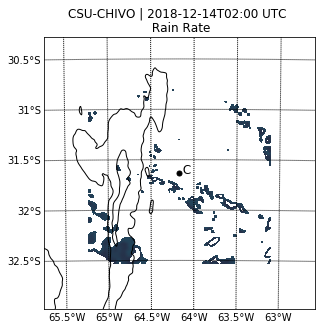

In [59]:
# Echo top figure

fig = plt.figure(figsize=(6, 5))



m = Basemap(projection='lcc', resolution=None,
            width=300E3, height=300E3, 
            lat_0=lat_0, lon_0=lon_0)

#m.etopo(scale=2, alpha=0.5)

parallels = np.arange(-40,-20,0.5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,False, False])

meridians = np.arange(-70,-60.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])

x_Cordoba, y_Cordoba = m(-64.19, -31.42)
x_CHIVO, y_CHIVO = m(-64.1686, -31.6342)
x_ARM, y_ARM = m(-64.7284, -32.1264)
x_Rio4to, y_Rio4to = m(-64.3493, -33.1232)

plt.plot(x_CHIVO, y_CHIVO, 'ok', markersize=5)
plt.text(x_CHIVO, y_CHIVO, ' C', fontsize=12);
                                       
# plt.plot(x_ARM, y_ARM, 'ok', markersize=5)
# plt.text(x_ARM, y_ARM, ' Y', fontsize=12);
                                       
levels_terr = [1, 2]

m.contour(Sierras_lons_grid, Sierras_lats_grid, Sierras_terr, levels_terr, 
               latlon = True, linewidths = 1, colors = 'k',
                      linestyles='solid', antialiased=True, animated=True)



lon_0 = grid.origin_longitude['data']
lat_0 = grid.origin_latitude['data']
chivo_lons, chivo_lats = grid.get_point_longitude_latitude()

x, y = np.meshgrid(0.001*grid.x['data'],  0.001*grid.y['data'])
R = np.sqrt(x ** 2 + y ** 2)
echo_top = np.ma.masked_where( R > 80, echo_top)
RainRate = np.ma.masked_where( R > 80, RainRate)
RainRate = np.ma.masked_where( RainRate < 1, RainRate)
HydroClass = np.ma.masked_where(HydroClass < 10, HydroClass)
HydroClass = np.ma.masked_where(HydroClass > 11, HydroClass)
HydroClass = np.ma.masked_where(R > 80, HydroClass)
HydroClass = np.ma.masked_where(max_ref <  40, HydroClass)
# HydroClass_smooth = spyi.gaussian_filter(HydroClass, sigma = 1)
# HydroClass_smooth = np.ma.masked_where(HydroClass_smooth < 10, HydroClass_smooth)
# HydroClass_smooth = np.ma.masked_where(HydroClass_smooth > 11, HydroClass_smooth)
  
cs = m.pcolormesh(chivo_lons, chivo_lats, HydroClass_smooth, vmin=0, vmax=12, latlon=True,
        cmap=cmocean.cm.rain)

#cmap = pyart.graph.cm.NWSRef)#cmap = pyart.graph.cm.LangRainbow12)#cmap=cmocean.cm.rain)#, norm=norm_precip)
   
#m.colorbar(cs, label='Rain Rate (mm/h)')

time_start = netCDF4.num2date(grid.time['data'][0], grid.time['units'])
time_text = time_start.strftime('%Y-%m-%dT%H:%M UTC')


plt.title('CSU-CHIVO | '+ time_text+ ' \n Rain Rate')

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'animated'


Text(0.5, 1.0, 'CSU-CHIVO | 2018-12-14T02:00 UTC \n Rain Rate')

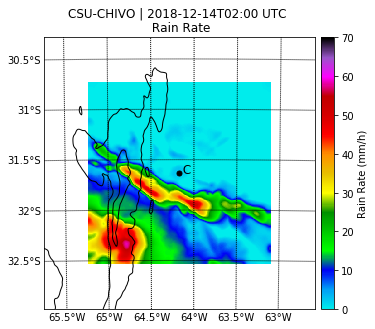

In [40]:
# Echo top figure

fig = plt.figure(figsize=(6, 5))



m = Basemap(projection='lcc', resolution=None,
            width=300E3, height=300E3, 
            lat_0=lat_0, lon_0=lon_0)

#m.etopo(scale=2, alpha=0.5)

parallels = np.arange(-40,-20,0.5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,False, False])

meridians = np.arange(-70,-60.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])

x_Cordoba, y_Cordoba = m(-64.19, -31.42)
x_CHIVO, y_CHIVO = m(-64.1686, -31.6342)
x_ARM, y_ARM = m(-64.7284, -32.1264)
x_Rio4to, y_Rio4to = m(-64.3493, -33.1232)

plt.plot(x_CHIVO, y_CHIVO, 'ok', markersize=5)
plt.text(x_CHIVO, y_CHIVO, ' C', fontsize=12);
                                       
# plt.plot(x_ARM, y_ARM, 'ok', markersize=5)
# plt.text(x_ARM, y_ARM, ' Y', fontsize=12);
                                       
levels_terr = [1, 2]

m.contour(Sierras_lons_grid, Sierras_lats_grid, Sierras_terr, levels_terr, 
               latlon = True, linewidths = 1, colors = 'k',
                      linestyles='solid', antialiased=True, animated=True)



lon_0 = grid.origin_longitude['data']
lat_0 = grid.origin_latitude['data']
chivo_lons, chivo_lats = grid.get_point_longitude_latitude()

x, y = np.meshgrid(0.001*grid.x['data'],  0.001*grid.y['data'])
R = np.sqrt(x ** 2 + y ** 2)
echo_top = np.ma.masked_where( R > 80, echo_top)
RainRate = np.ma.masked_where( R > 80, RainRate)
RainRate = np.ma.masked_where( RainRate < 1, RainRate)
HydroClass = np.ma.masked_where(HydroClass < 10, HydroClass)
HydroClass = np.ma.masked_where(HydroClass > 11, HydroClass)
HydroClass = np.ma.masked_where(R > 80, HydroClass)
#HydroClass = np.ma.masked_where(max_ref <  40, HydroClass)
  
cs = m.pcolormesh(chivo_lons, chivo_lats, max_ref, vmin=0, vmax=70, latlon=True,
        cmap=pyart.graph.cm.NWSRef)

#cmap = pyart.graph.cm.NWSRef)#cmap = pyart.graph.cm.LangRainbow12)#cmap=cmocean.cm.rain)#, norm=norm_precip)
   
m.colorbar(cs, label='Rain Rate (mm/h)')

time_start = netCDF4.num2date(grid.time['data'][0], grid.time['units'])
time_text = time_start.strftime('%Y-%m-%dT%H:%M UTC')


plt.title('CSU-CHIVO | '+ time_text+ ' \n Rain Rate')